<a href="https://colab.research.google.com/github/aldisstar/Taller-MIT/blob/main/LinearRegression_Taller_MIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning
This tutorial was composed by Taylor Baum with adaptations from the National Science Foundation (NSF) Center for Brains, Minds and Machines Quantitative Methods Workshop, [2], and [3].

## Introduction

An **algorithm** is similar to a recipe. More formally, an **algorithm** is a process or set of rules with which a task is completed or with which an input is manipulated to produce an output. For example, we use algorithms for tasks like sorting.

What if there is a task where the algorithm isn’t obvious? What can we do? Well, we often have a large amount of data that we can use to help inform how we produce appropriate outputs from these inputs. As beautifully defined in [1], "Machine Learning provides automated methods of data analysis that can then be used further. Machine Learning is a set of methods that can automatically detect patterns in data, and then use the uncovered patterns to predict future data, or to perform other kinds of decision making under uncertainty."

## Where did the idea for Machine Learning come from?

Traditionally, humans learn how to do certain tasks from experience in the real-world while computers must be instructed to do things. Machine learning is a field which seeks to enable computers and machines to learn from experience. The experience that computers have access to is known as data.

Thus far, there are three different ways that a machine can learn: **supervised learning**, **unsupervised learning**, and **reinforcement learning**. We will focus on the first two methods.

**Supervised learning** uses **labeled** data as it’s feature set or the data we initially have to learn patterns from. The labeled data is a set of input-output pairs. In other words, you have input variables (X) and their corresponding output variables (Y) and you want to learn the mapping between these variables.

**Unsupervised learning** uses **unlabeled** data as it’s feature set or the data we initially have to learn patterns from. In **unsupervised learning**, we only have a set of inputs, and the goal is to discover interesting patterns in the data.

Some examples of achievements which are direct results of the benefits of machine learning are AlphaGo, a system which can outperform a champion Go player, face detection on the iPhone, and various object detection paradigms. In the past three examples, we see that these tasks are complex, like a game with many rules. Before Machine Learning approaches, progress towards achieving these tasks was minimal.

## How do we learn from data?

To get an understanding of how patterns and relationships may be uncovered in data to then be used for future predictions or decision making, let's dive into some interactive examples.

Each case where we want to use machine learning is unique, but can be boiled down into a few main components:

1.   Identifying the Input-Output Relationship to Learn
2.   Feature Extraction and Engineering
3.   Model Training
4.   Model Validation

We will learn that these general steps are useful to guide the development of many machine learning models. We can expand these steps to more specifically reference certain problem spaces, however, these underlying steps will still be present.

First, we will look at an example of **supervised learning**, where we have a set of input/output pairs and we would like to find a relationship between these inputs and outputs. We will use a very simple synthetic data set.

## Tutorial 1: Linear Least Squares Regression

In this first tutorial, we will be moving through training of a linear regression. We will follow the following steps:
1. Import and download all necessary packages and classes
2. Identify and prepare the data you desire to learn about
3. Create the model and fit it with the existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.

We are working with a data set used in Google's Machine Learning Crash Course. [Link to data description.](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

### Step 1: Import Packages and Classes
First, we make sure to import the packages and classes necessary to run the tutorial!


In [ ]:
import numpy as np # a package for manipulating numbers and using arrays
from sklearn.linear_model import LinearRegression # a package with an optimized LinearRegression class
import matplotlib.pyplot as plt # a package with plotting capabilities
import seaborn as sns # a package for data visualization
import pandas as pd

### Step 2: Download Data and Feature Engineering

Next we load and prepare our data. We can do this in multiple ways. Google has provided a link from which we can directly download the data, so we do it this way. We load the data into a Pandas dataframe!

In [ ]:
# Import the dataset into a pandas df
census_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label by 1000
census_df["median_house_value"] /= 1000.0
print(census_df[["median_house_value","total_rooms"]])

# Print the first rows of the pandas df
census_df.head()

       median_house_value  total_rooms
0                    66.9       5612.0
1                    80.1       7650.0
2                    85.7        720.0
3                    73.4       1501.0
4                    65.5       1454.0
...                   ...          ...
16995               111.4       2217.0
16996                79.0       2349.0
16997               103.6       2677.0
16998                85.8       2672.0
16999                94.6       1820.0

[17000 rows x 2 columns]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


To start, we explore the data to understand the distribution, and which features may be important for predicting median_house_value.

In [ ]:
census_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


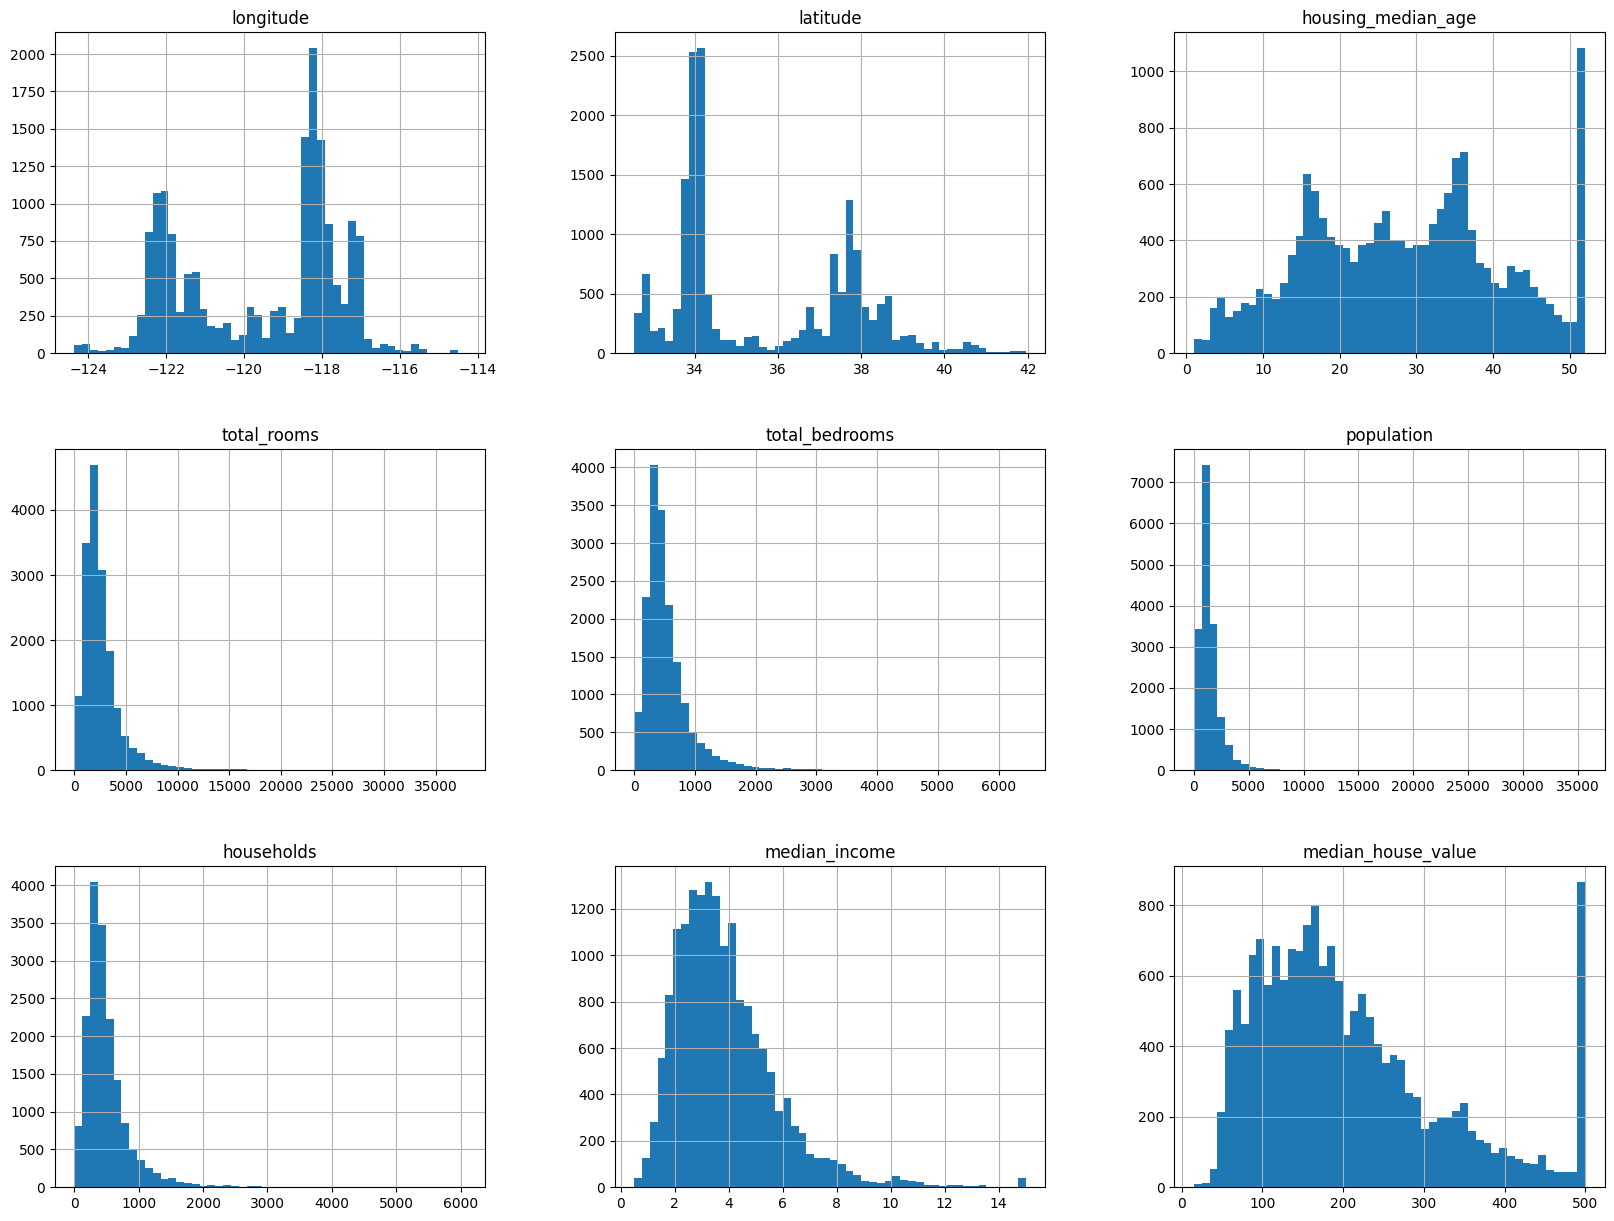

In [ ]:
census_df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

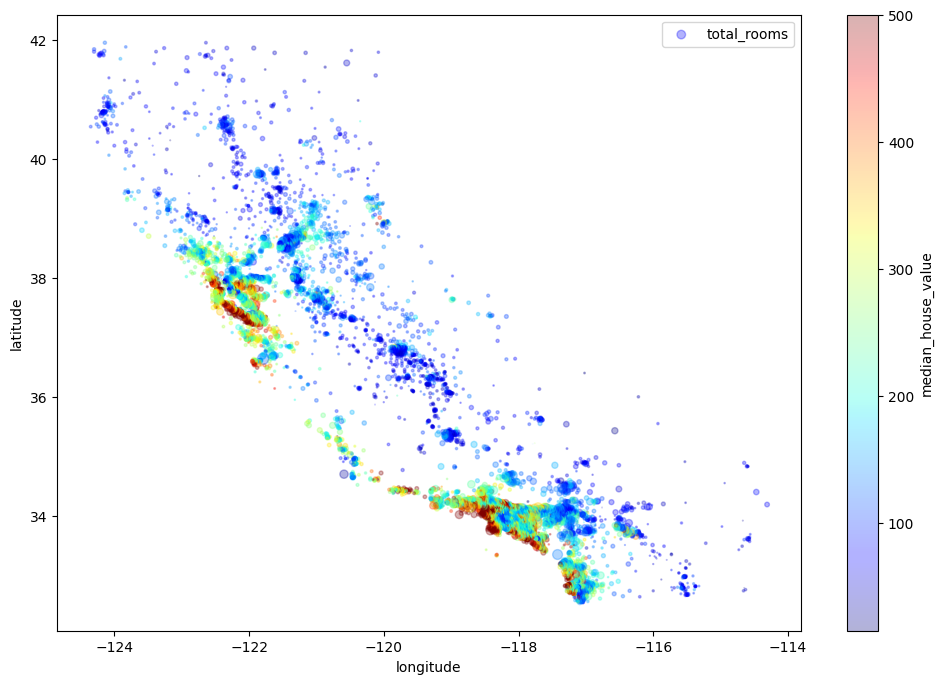

In [ ]:
# s is the size and c is the color
census_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3, s=census_df["total_rooms"]/500,
             label="total_rooms", c="median_house_value", figsize=(12,8),
             cmap=plt.get_cmap("jet"), colorbar=True)

Based on what we see in the data, we'll pick one feature from the pandas DataFrame to use as our input value for prediction of median_house_value.

#### Exercise: Extract Data

Tasks:

- Get comfortable with the structure of the data: [Link to data description](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)
- Make an input data matrix or vector, `x`, with the information from column "total_rooms"
- Make an output data matrix or vector, `y`, with the information from column "median_house_value"

*Make these keeping in mind that they will be used with the functions from the `LinearRegression()` class from sklearn.*


In [ ]:
# Generate Input Matrix or Vector
x = census_df['total_rooms'].values
print(x)
x = x.reshape(-1, 1)
print(x)

# Generate Output Matrix or Vector
y = census_df['median_house_value'].values
# y = y.reshape(-1, 1)

[5612. 7650.  720. ... 2677. 2672. 1820.]
[[5612.]
 [7650.]
 [ 720.]
 ...
 [2677.]
 [2672.]
 [1820.]]


### Step 3: Create and Fit the Model

Next, we take advantage of the `LinearRegression()` class that we downloaded from the `sklearn` package. First, we create an instance of the `LinearRegression()` class. Next, we use the `.fit(x,y)` method from this class.

#### Exercise: Fit Model

Tasks:
- Instantiate a `LinearRegression()` class from sklearn
- Fit the model using a method from the `LinearRegression()` class from sklearn


In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

We can actually condense these first two lines to one line, and get an equivalent output! These types of shortcuts make more sense the more one attemtps their own projects.

In [ ]:
model = LinearRegression().fit(x, y)

### Step 4: Get Results

After fitting the model, we would like to explore the results and performance of the model! There are many values we can derive which describe characteristics of our fit.

$r$, a value between -1 and 1, is the **correlation coefficient**, which will be defined in the tutorial. Values further from 0 indicate a stronger relationship between the two variables.

To derive $r$, we use the function below. Sometimes this function is already coded in packages. We will see that the `.score(x, y)` function outputs the $r^2$ value.

$r = \frac{1}{n-1}\sum\limits_{i}^{n}{\frac{x_i-\bar{x}}{s_x} \frac{y_i-\bar{y}}{s_y}}$

where $\bar{x}$, $\bar{y}$, $s_x$ and $s_y$ are the respecive means and standard deviations of the respective variables.

$r^2$, ranging from 0 to 1, is the **coefficient of determination**. This is equal to the proportion of the total variability explained by the model. An $r^2$ of 0 means that the dependent variable cannot be predicted from the independent variable. An $r^2$ of 1 means the dependent variable can be predicted without error from the independent variable. To get a deeper look into the underlying mathematics, please reference [5].

#### Exercise: Explore Model and Assess Model Fit

Tasks:
- Assess the fit of this model with the coefficient of determination using methods from the `LinearRegression()` class from sklearn
- Extract the parameters learned from this model (slope and intercept of a linear model)

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.01715876423118068


From using this `LinearRegression()` class and its method `.fit(x, y)` we have output model which has different methods. Above, we looked at the method `.score(x, y)` which output the $r^2$ value for this set of input output pairs with this trained model.

Below, we extract the learned y-intercept, and slope. We can use these values to then predict unknown input/output pairs in the future!

In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 188.87620582068635
slope: [0.00696938]


### Step 5: Make Predictions

After fitting the model, we would now like to visualize the results and then use the results to predict future outputs of new inputs.

#### Exercise: Visualize Your Model

Tasks:
- Use the trained model to predict new data
  - Create a vector of new values, `x_synth`, in the range of "total_rooms" values and predict what output "median_house_value" you would get, `y_pred`
  - Generate a plot of your inferences and a plot of the original data
- Briefly answer whether or not this is a good overall model to predict "median_house_value"


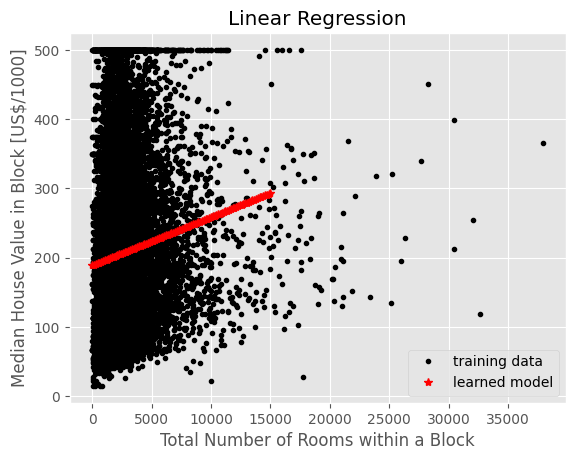

In [ ]:
plt.style.use('ggplot')

plt.plot(x, y, 'ko', markersize=3) # plot the original data in black ('k') circles ('o')

x_synth = np.linspace(0, 15000, 100).reshape((-1, 1))

y_pred_package = model.predict(x_synth)
plt.plot(x_synth, y_pred_package, 'r*') # plot in a red ('r') line (default)


plt.xlabel('Total Number of Rooms within a Block')
plt.ylabel('Median House Value in Block [US$/1000]')
plt.title('Linear Regression')
plt.legend(['training data', 'learned model'])
plt.show()

Above, we used a built-in function `.predict` to generate our estimated outputs from our learned relationship or the results from the model fit. To show that we understand what we just completed, however, we can verify. that using the parameters we solved for by replacing them in the model equation. If this gives us the same result, then we know that we have a deep understanding of the model!

We know that $y = mx + b$ is the model that we are trying to fit. We solved for the y-intercept or $b$, along with the slope or $m$. Using our learned paramters, we can generate our predictions by coding the equation by hand, as shown below.

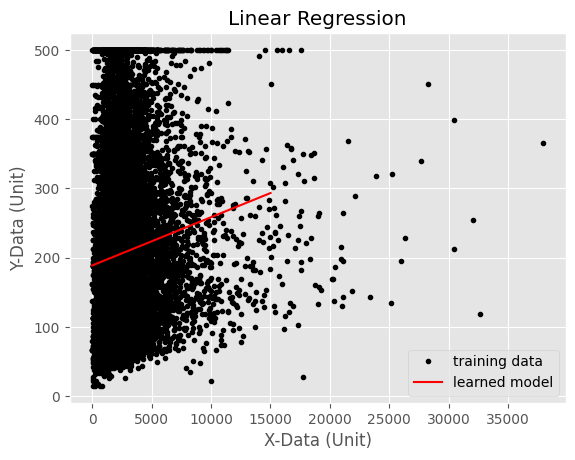

In [ ]:
plt.plot(x, y, 'ko', markersize=3)

x_synth = np.linspace(0, 15000, 100).reshape((-1, 1))

y_pred_user = (model.coef_ * x_synth) + model.intercept_
plt.plot(x_synth, y_pred_user, 'r')


plt.xlabel('X-Data (Unit)')
plt.ylabel('Y-Data (Unit)')
plt.title('Linear Regression')
plt.legend(['training data', 'learned model'])
plt.show()

#### Exercise: Assess Your Performance With the Test Set

Tasks:
- From the downloaded test data set, generate `x_test` with the "total_rooms" column and `y_test` with the "median_house_value" column
- Assess the performance of the model trained on the training data from before with this new test data (predict `y_test` from `x_test` using the previous `model`)

In [ ]:
census_test_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the label by 1000
census_test_df["median_house_value"] /= 1000.0

census_test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344.7
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176.5
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270.5
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81.7


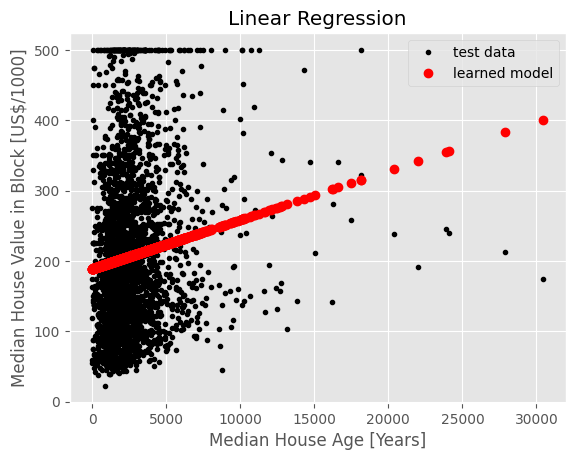

Sum of Squares Error: 1.316496847811102


In [ ]:
# Generate New Input Vector
x_test = census_test_df['total_rooms'].values
x_test = x_test.reshape(-1, 1)

# Generate Same Output Vector
y_test = census_test_df['median_house_value'].values

# Plot Results -----------------------------------------------------------------
plt.style.use('ggplot')
plt.plot(x_test, y_test, 'ko', markersize=3)

y_pred_package = model.predict(x_test)
plt.plot(x_test, y_pred_package, 'ro')


plt.xlabel('Median House Age [Years]')
plt.ylabel('Median House Value in Block [US$/1000]')
plt.title('Linear Regression')
plt.legend(['test data', 'learned model'])
plt.show()

# Assess Accuracy With Sum of Squares Error
error = (np.average(y_test - y_pred_package))**2
print('Sum of Squares Error: ' + str(error))

### Repeat!

Now, we have moved through an instance of generating a linear regression model from a feature of our census data, and we should see that it is quite a poor fit! If you visualize the data correctly, the relationship between our chosen feature, and our chosen output do not look like a linear relationship by any means.

Let's move through this entire process a few more times to see if we can improve our results!

#### Exercise: Train Your Model Using A Different Input Feature

Tasks:
- Move through the same steps above, but use a different column of the DataFrame for prediction (make a new `x` to start)

coefficient of determination: 0.011397208019458205


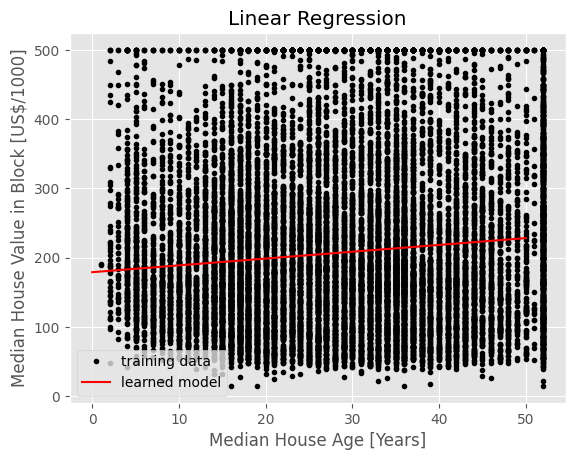

In [ ]:
# Generate New Input Vector
x = census_df['housing_median_age'].values
x = x.reshape(-1, 1)

# Generate Same Output Vector
y = census_df['median_house_value'].values

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# Plot Results -----------------------------------------------------------------
plt.style.use('ggplot')
plt.plot(x, y, 'ko', markersize=3)

x_synth = np.linspace(0, 50, 100).reshape((-1, 1)) # synthetic x-data

y_pred_package = model.predict(x_synth)
plt.plot(x_synth, y_pred_package, 'r')


plt.xlabel('Median House Age [Years]')
plt.ylabel('Median House Value in Block [US$/1000]')
plt.title('Linear Regression')
plt.legend(['training data', 'learned model'])
plt.show()

#### Exercise: Train Your Model Following Feature Engineering

It is clear that many of the features in the DataFrame do not have much predictive power. In this case, it might makes sense to move forward with some feature engineering!

If we look at the data we have access to, and think intuitively, we can come up with an approach. We suggest **'total_rooms' / 'population'** as an input feature!

Tasks:
- Move through the same steps above, but use a feature that you engineered (make a new `x` to start) from dividing total_rooms by population.

coefficient of determination: 0.04283604186609846


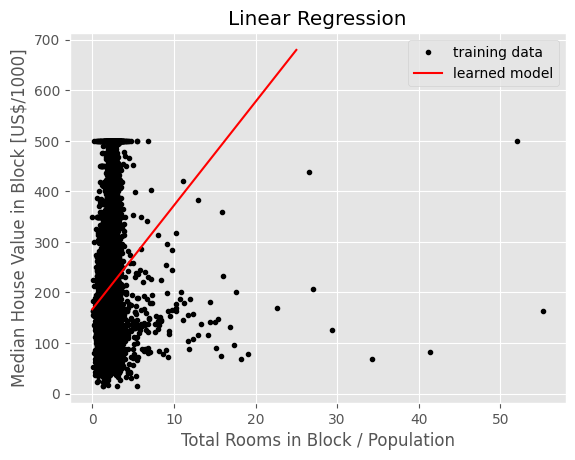

In [ ]:
# Generate New Input Vector
x = census_df['total_rooms'].values / census_df['population'].values
x = x.reshape(-1, 1)

# Generate Same Output Vector
y = census_df['median_house_value'].values

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# Plot Results -----------------------------------------------------------------
plt.style.use('ggplot')
plt.plot(x, y, 'ko', markersize=3)

x_synth = np.linspace(0, 25, 100).reshape((-1, 1))

y_pred_package = model.predict(x_synth)
plt.plot(x_synth, y_pred_package, 'r')


plt.xlabel('Total Rooms in Block / Population')
plt.ylabel('Median House Value in Block [US$/1000]')
plt.title('Linear Regression')
plt.legend(['training data', 'learned model'])
plt.show()

#### Exercise: Explore the Data with Statistics to Find the Best Feature

Given we are getting such poor results, let's take a more statistics based approach to assess what features may be most useful.

Tasks:
- Use the `.corr()` DataFrame method to assess the correlation coefficient, r for each variable to each other variable
- Visualize the output from `.corr()`
- What is the best feature to use to predict house price based on this? Hint: look at the values in the median_house_value row or column.
- Train the linear regression with this feature, and visualize performance.

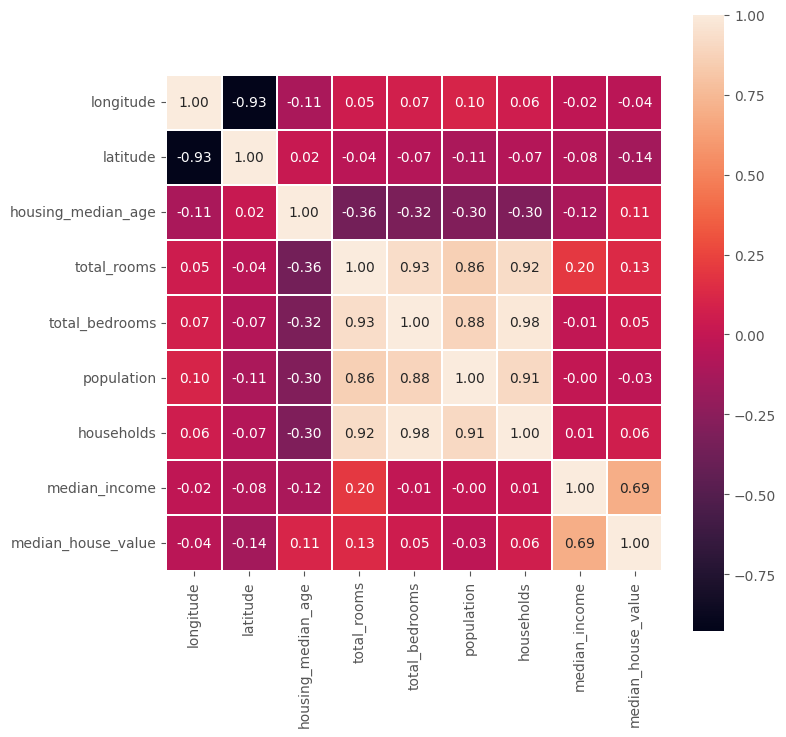

In [ ]:
# Generate correlation matrix
corr_matrix = census_df.corr()

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidth=.3, square=True)

coefficient of determination: 0.478684932375828


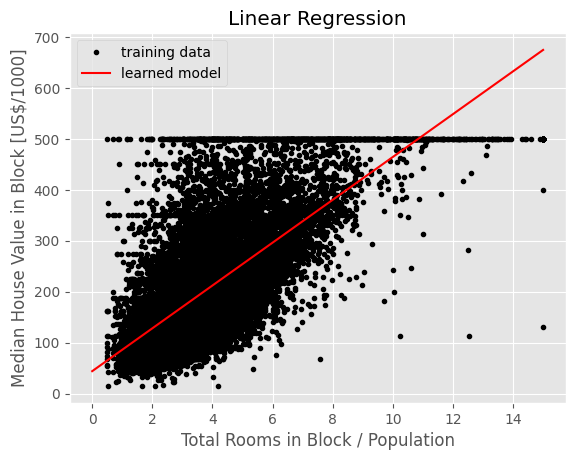

In [ ]:
# Generate New Input Vector
x = census_df['median_income'].values
x = x.reshape(-1, 1)

# Generate Same Output Vector
y = census_df['median_house_value'].values

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# Plot Results -----------------------------------------------------------------
plt.style.use('ggplot')
plt.plot(x, y, 'ko', markersize=3)

x_synth = np.linspace(0, 15, 100).reshape((-1, 1))

y_pred_package = model.predict(x_synth)
plt.plot(x_synth, y_pred_package, 'r')


plt.xlabel('Total Rooms in Block / Population')
plt.ylabel('Median House Value in Block [US$/1000]')
plt.title('Linear Regression')
plt.legend(['training data', 'learned model'])
plt.show()

## Creating a Model With Multiple Input Features

Taking a statistic approach to feature selection yielded better results, but there is still room for improvement. Let's try creating a model with multiple input features.

#### Exercise: Train Your Model with Multiple Input Features

Tasks:
- Build a machine learning model with the following features from the data set (combine the input features in some way into one matrix to be used) and assess the fit of the model with your correlation coefficient
  - 'total_rooms'/'population',
  - 'median_income'
  - 'households'/'population'
  - 'longitude'

In [ ]:
# Generate a New Input Vector
x_1 = census_df['median_income'].values
x_2 = census_df['total_rooms'].values / census_df['population'].values
x_3 = census_df['households'].values / census_df['population'].values
x_4 = census_df['total_bedrooms'].values / census_df['population'].values
x = np.vstack((x_1, x_2, x_3, x_4))
x = np.swapaxes(x, 0, 1)

# Generate the Same Output Vector as Before
y = census_df['median_house_value'].values

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5664730555366541


Using more input features allowed us to create a model with better performance. Now, let's continue to assess performance using the test data set.

Tasks:
- From the downloaded test data set, generate `x_test` with the same columns that you used to create your training input data matrix, `x`, and `y_test` with the "median_house_value" column
- Assess the performance of the model trained on the training data from before with this new test data (predict `y_test` from `x_test` using the previous `model`)

#### Exercise: Assess Your Performance With the Test Set



In [ ]:
census_test_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the label by 1000
census_test_df["median_house_value"] /= 1000.0


census_test_df.head()


x_test_1 = census_test_df['median_income'].values
x_test_2 = census_test_df['total_rooms'].values / census_test_df['population'].values
x_test_3 = census_test_df['households'].values / census_test_df['population'].values
x_test_4 = census_test_df['total_bedrooms'].values / census_test_df['population'].values
x_test = np.vstack((x_test_1, x_test_2, x_test_3, x_test_4))
x_test = np.swapaxes(x_test, 0, 1)


y_test = census_test_df['median_house_value'].values

# Use Model to Make Prediction
y_pred_package = model.predict(x_test)

# Assess Accuracy
error = (np.average(y_test - y_pred_package))**2
print('Sum of Squares Error: ' + str(error))

Sum of Squares Error: 4.335844072263117


## Questions

**What type of learning is linear regression and why?**


Supervised! We give the model the inputs and the outputs to learn from. In our case, we were feeding in census data features (total_rooms for instance) to predict median_house_value!

**Why was the initial model we trained with "total_rooms" as the input feature not a great model?**

The structure of the data was not in the format of a line. It was more of a cloud of points. Thus a linear regression model would not work well.

**What was the goal of building a machine learning model in this example?**

The goal was prediction of median_house_price! This is useful in cases where you maybe would want to assign house price values for a large data set of houses from the census data!

**Think about the different models we created during this excercise. Which one performed the best? Why do you think this is?**

The model where we selected the statistical feature / multiple features. We gave the model more information, so it seemed to have learned more! We have to be careful about this assertion, however. In the model validation section, we will revisit the idea of a "good model." A good model is not always just from looking at things like the score!

# Sources
1. Murphy, Kevin P.. Machine Learning: A Probabilistic Perspective, MIT Press, 2012. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/pensu/detail.action?docID=3339490.
2. https://realpython.com/linear-regression-in-python/#linear-regression
https://github.com/scikit-learn/scikit-learn/blob/7813f7efb/sklearn/linear_model/base.py#L367
3. https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=linear_regression_real_tf2-colab&hl=en#scrollTo=RomQTd1OPVd0